# Predicting MLB Salaries

## Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import math

Import the batting, pitching and salary data. The data comes from the Lahman Baseball Database. http://www.seanlahman.com/baseball-database.html

In [2]:
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
salaries = pd.read_csv('Salaries.csv')

In [3]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


Below is a description of the variables in the batting data frame. It is a data frame with 102816 observations on 22 variables.
- playerID - Player ID code
- yearID - Year
- stint - player’s stint (order of appearances within a season)
- teamID - Team; a factor
- lgID - League; a factor with levels AA AL FL NL PL UA
- G - Games: number of games in which a player played
- AB - At Bats
- R - Runs
- H - Hits: times reached base because of a batted, fair ball without error by the defense
- 2B - Doubles: hits on which the batter reached second base safely
- 3B - Triples: hits on which the batter reached third base safely
- HR - Homeruns
- RBI - Runs Batted In
- SB - Stolen Bases
- CS - Caught Stealing
- BB - Base on Balls
- SO - Strikeouts
- IBB - Intentional walks
- HBP - Hit by pitch
- SH - Sacrifice hits
- SF - Sacrifice flies
- GIDP - Grounded into double plays

In [4]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [5]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


Pitching: A data frame with 44963 observations on the following 30 variables.
- playerID Player ID code
- yearID Year
- stint player’s stint (order of appearances within a season)
- teamID Team; a factor
- lgID League; a factor with levels AA AL FL NL PL UA
- W Wins
- L Losses
- G Games
- GS Games Started
- CG Complete Games
- SHO Shutouts
- SV Saves
- IPouts Outs Pitched (innings pitched x 3)
- H Hits
- ER Earned Runs
- HR Homeruns
- BB Walks
- SO Strikeouts
- BAOpp Opponent’s Batting Average
- ERA Earned Run Average
- IBB Intentional Walks
- WP Wild Pitches
- HBP Batters Hit By Pitch
- BK Balks
- BFP Batters faced by Pitcher
- GF Games Finished
- R Runs Allowed
- SH Sacrifices by opposing batters
- SF Sacrifice flies by opposing batters
- GIDP Grounded into double plays by opposing batter

In [6]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


In [7]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


Salaries: A data frame with 26428 observations on the following 5 variables.
- yearID Year
- teamID Team; a factor
- lgID League; a factor
- playerID Player ID code
- salary Salary

Drop the years before 1985.  Salary data not available.

In [8]:
batting_1985 = batting[batting.yearID > 1984]
pitching_1985 = pitching[pitching.yearID > 1984]

In [9]:
batting_1985.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000
mean,2001.524657,1.081770,50.906647,123.737068,16.515045,32.355497,6.228085,0.700693,3.575868,15.648742,2.358849,1.015920,11.900288,23.642581,0.973310,1.101831,1.217389,1.026222,2.777411
std,9.085021,0.287192,46.107731,181.238290,27.029322,50.721758,10.234521,1.626015,7.372347,26.539534,6.542026,2.348021,20.513077,34.268786,2.719686,2.443462,2.447796,1.959216,4.693949
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,1.000000,34.000000,22.000000,2.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.000000,75.000000,189.000000,22.000000,47.000000,9.000000,1.000000,3.000000,21.000000,1.000000,1.000000,16.000000,35.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,2016.000000,4.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000


In [10]:
pitching_1985.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,...,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,12063.000000,12063.000000,12061.000000
mean,2002.025872,1.084622,3.672522,3.672522,26.090127,7.347145,0.436121,0.141771,1.852625,196.889756,...,1.976280,2.383676,2.237152,0.348947,282.248261,6.911024,33.533604,2.141922,1.878388,5.322610
std,9.036945,0.289777,4.433829,3.839559,20.406921,11.094134,1.395408,0.521453,6.551777,190.060773,...,2.301131,2.766560,2.694288,0.860614,266.642048,11.518385,31.189015,2.710191,2.121352,5.990178
min,1985.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,2003.000000,1.000000,2.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,139.000000,...,1.000000,2.000000,1.000000,0.000000,202.000000,2.000000,23.000000,1.000000,1.000000,3.000000
75%,2010.000000,1.000000,5.000000,6.000000,35.000000,12.000000,0.000000,0.000000,0.000000,265.000000,...,3.000000,4.000000,3.000000,0.000000,380.000000,9.000000,47.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,27.000000,21.000000,94.000000,40.000000,20.000000,10.000000,62.000000,856.000000,...,18.000000,26.000000,21.000000,16.000000,1231.000000,79.000000,160.000000,21.000000,14.000000,40.000000


Delete the fielding players that have less than 100 games.  We want to throw out players who are injured. 

In [11]:
batting_1985_100g = batting_1985[batting_1985.G >= 100]


In [12]:
batting_1985_100g.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,2000.850803,1.004991,133.641306,460.452583,65.339404,125.965331,24.393093,2.785377,14.823688,62.255632,9.767301,4.033320,46.570080,81.405909,4.193174,4.209227,2.568056,4.020370,10.441117
std,9.185847,0.074207,18.525777,115.207988,24.334992,38.296878,9.491628,2.602241,10.551384,27.106037,11.836364,3.797469,23.021849,33.154159,4.935326,3.881065,3.471900,2.542725,5.263401
min,1985.000000,1.000000,100.000000,95.000000,7.000000,18.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,1.000000,117.000000,382.000000,47.000000,98.000000,18.000000,1.000000,7.000000,42.000000,2.000000,1.000000,30.000000,57.000000,1.000000,1.000000,0.000000,2.000000,7.000000
50%,2001.000000,1.000000,136.000000,472.000000,64.000000,127.000000,24.000000,2.000000,13.000000,59.000000,5.000000,3.000000,43.000000,78.000000,3.000000,3.000000,1.000000,4.000000,10.000000
75%,2009.000000,1.000000,150.000000,554.000000,83.000000,155.000000,31.000000,4.000000,21.000000,81.000000,13.000000,6.000000,59.000000,102.000000,6.000000,6.000000,4.000000,5.000000,14.000000
max,2016.000000,3.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000


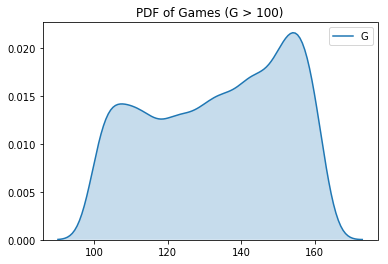

In [13]:
sns.kdeplot(batting_1985_100g.G, shade=True)
plt.title("PDF of Games (G > 100)")
plt.show()

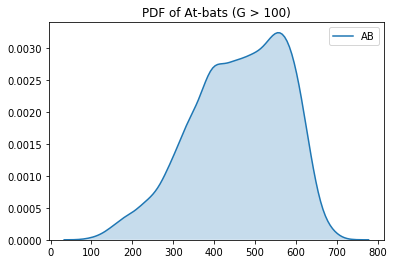

In [14]:
sns.kdeplot(batting_1985_100g.AB, shade=True)
plt.title("PDF of At-bats (G > 100)")
plt.show()

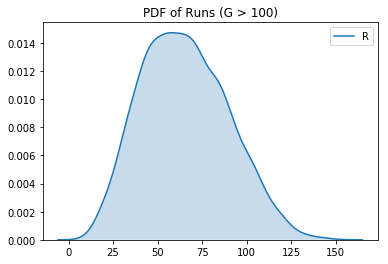

In [15]:
sns.kdeplot(batting_1985_100g.R, shade=True)
plt.title("PDF of Runs (G > 100)")
plt.show()

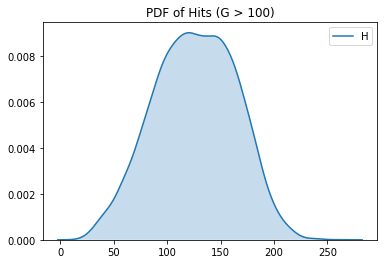

In [16]:
sns.kdeplot(batting_1985_100g.H, shade=True)
plt.title("PDF of Hits (G > 100)")
plt.show()

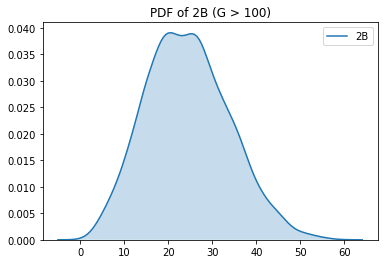

In [17]:
sns.kdeplot(batting_1985_100g['2B'], shade=True)
plt.title("PDF of 2B (G > 100)")
plt.show()

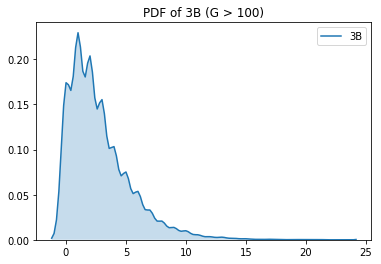

In [18]:
sns.kdeplot(batting_1985_100g['3B'], shade=True)
plt.title("PDF of 3B (G > 100)")
plt.show()

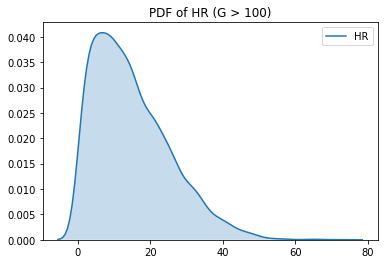

In [19]:
sns.kdeplot(batting_1985_100g.HR, shade=True)
plt.title("PDF of HR (G > 100)")
plt.show()

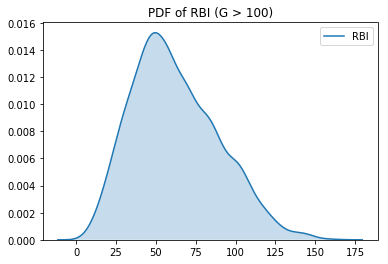

In [20]:
sns.kdeplot(batting_1985_100g.RBI, shade=True)
plt.title("PDF of RBI (G > 100)")
plt.show()

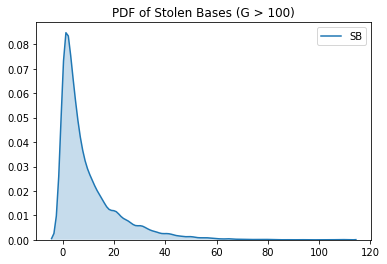

In [21]:
sns.kdeplot(batting_1985_100g.SB, shade=True)
plt.title("PDF of Stolen Bases (G > 100)")
plt.show()

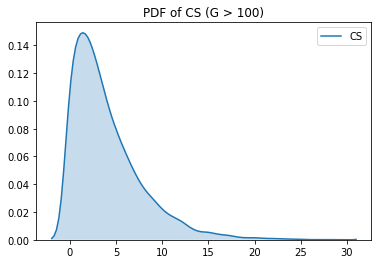

In [22]:
sns.kdeplot(batting_1985_100g.CS, shade=True)
plt.title("PDF of CS (G > 100)")
plt.show()

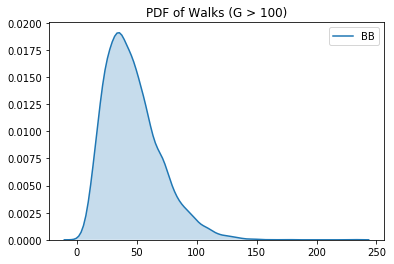

In [23]:
sns.kdeplot(batting_1985_100g.BB, shade=True)
plt.title("PDF of Walks (G > 100)")
plt.show()

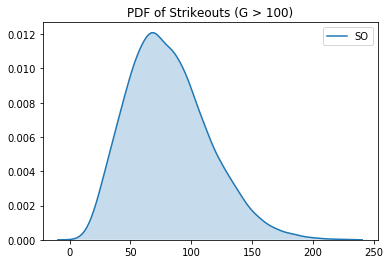

In [24]:
sns.kdeplot(batting_1985_100g.SO, shade=True)
plt.title("PDF of Strikeouts (G > 100)")
plt.show()

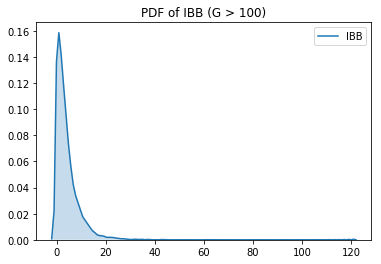

In [25]:
sns.kdeplot(batting_1985_100g.IBB, shade=True)
plt.title("PDF of IBB (G > 100)")
plt.show()

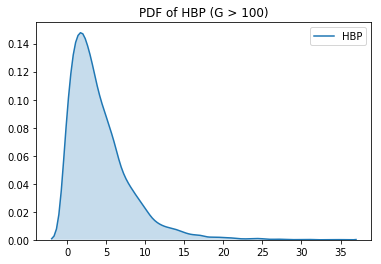

In [26]:
sns.kdeplot(batting_1985_100g.HBP, shade=True)
plt.title("PDF of HBP (G > 100)")
plt.show()

In [27]:
df = pd.merge(salaries, batting_1985_100g)

In [28]:
df.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0


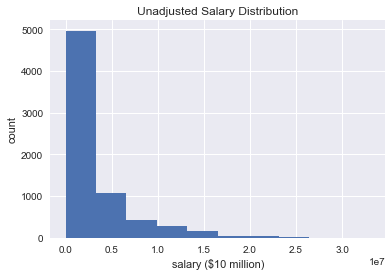

In [29]:
sns.set()
_ = plt.hist(df.salary)
plt.xlabel('salary ($10 million)')
plt.ylabel('count')
plt.title('Unadjusted Salary Distribution')
plt.show()

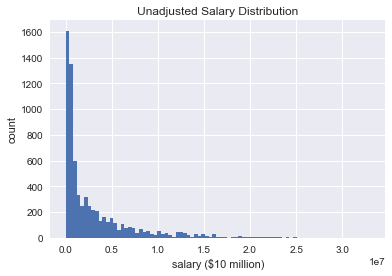

In [30]:
n_data = len(df.salary)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
_ = plt.hist(df.salary, bins = n_bins)
_ = plt.xlabel('salary ($10 million)')
_ = plt.ylabel('count')
_ = plt.title('Unadjusted Salary Distribution')
plt.show()

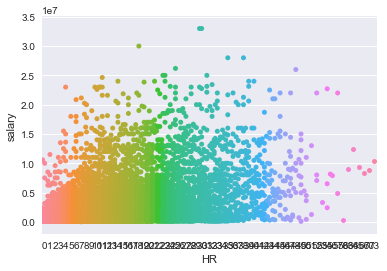

In [31]:
sns.swarmplot(x='HR', y='salary', data = df)
plt.show()

Plot unadjusted salary over time for the years 1985 - 2016.  Unadjusted salary is salary that is not adjusted for inflation, or is in nominal dollars.

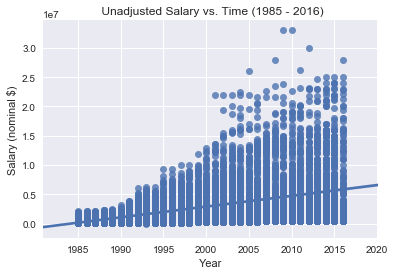

In [32]:
sns.regplot(x='yearID',
            y='salary',
           data=df)
plt.title(' Unadjusted Salary vs. Time (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary (nominal $)')
plt.show()

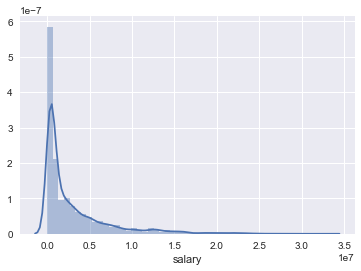

In [33]:
sns.distplot(df.salary)
plt.show()

There are rows that have zeros for the salary.  Remove these observations.  The lowest minimum salary in current year dollars was in 1985.  It was 60,000.  Remove the observations where the salary is less than 60,000.

In [34]:
df_clean1 = df[df.salary !=0]
df_clean2 = df_clean1[df_clean1.salary >= 60000]
df_clean2.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0


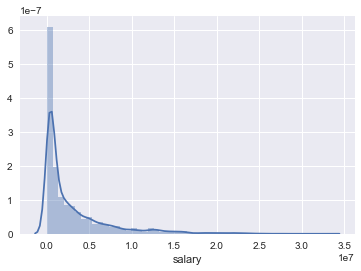

In [35]:
sns.distplot(df_clean2.salary)
plt.show()

Need to adjust salary for inflation.  For ease of interpretation, let's use 2016 dollars.  Use the CPI to calculate this.

In [36]:
cpi = pd.read_csv('CPI.csv')
cpi.head()

,yearID,CPI
0,1985,107.6
1,1986,109.6
2,1987,113.6
3,1988,118.3
4,1989,124.0


Merge the salary data and cpi data by year.  Use the CPI value to adjust salary to 2016 dollars.

In [37]:
salary_adj = pd.merge(df_clean2, cpi, how='left', on='yearID')
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,CPI
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,107.6
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,107.6
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,107.6
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,107.6
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,107.6


In [38]:
salary_adj['salary2016'] = (240/salary_adj.CPI)*salary_adj.salary
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,CPI,salary2016
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,107.6,1.784387e+06
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,107.6,5.576208e+05
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,107.6,3.345725e+06
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,107.6,1.014870e+06
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,107.6,3.624535e+06


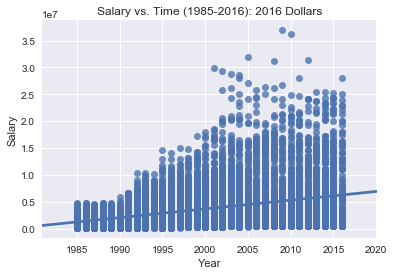

In [39]:
sns.regplot(x='yearID',
            y='salary2016',
            data=salary_adj)
plt.title('Salary vs. Time (1985-2016): 2016 Dollars')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

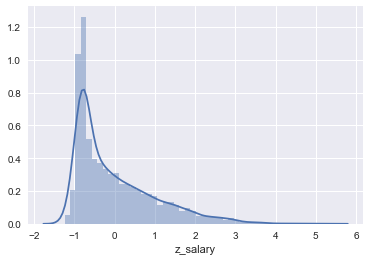

In [40]:
salary_adj['mean_salary'] = salary_adj['salary2016'].groupby(salary_adj['yearID']).transform('mean')
salary_adj['std_salary'] = salary_adj['salary2016'].groupby(salary_adj['yearID']).transform('std')
salary_adj.head()

salary_adj['z_salary'] = (salary_adj.salary2016 - salary_adj.mean_salary)/salary_adj.std_salary
salary_adj.head()

# plot z-scores for salary distribution
sns.distplot(salary_adj.z_salary)
plt.show()

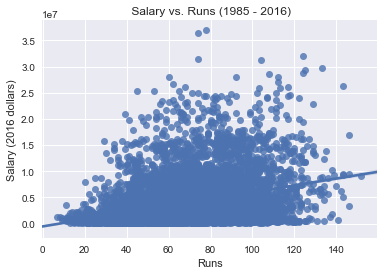

In [41]:
sns.regplot(x='R',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Runs (1985 - 2016)')
plt.xlabel('Runs')
plt.ylabel('Salary (2016 dollars)')
plt.show()

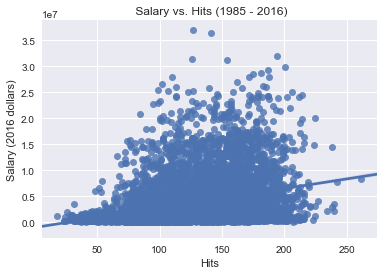

In [42]:
sns.regplot(x='H',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Hits (1985 - 2016)')
plt.xlabel('Hits')
plt.ylabel('Salary (2016 dollars)')
plt.show()

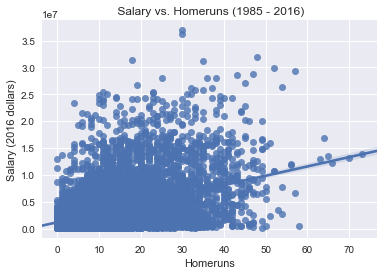

In [43]:
sns.regplot(x='HR',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Homeruns (1985 - 2016)')
plt.xlabel('Homeruns')
plt.ylabel('Salary (2016 dollars)')
plt.show()

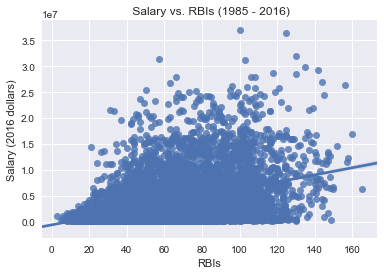

In [44]:
sns.regplot(x='RBI',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. RBIs (1985 - 2016)')
plt.xlabel('RBIs')
plt.ylabel('Salary (2016 dollars)')
plt.show()

## Regression Models

In [45]:
salary_adj = pd.DataFrame(salary_adj)
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,IBB,HBP,SH,SF,GIDP,CPI,salary2016,mean_salary,std_salary,z_salary
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,4.0,0.0,0.0,1.0,5.0,107.6,1.784387e+06,1.261677e+06,913318.087782,0.572319
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,4.0,3.0,1.0,2.0,13.0,107.6,5.576208e+05,1.261677e+06,913318.087782,-0.770877
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,4.0,1.0,0.0,6.0,18.0,107.6,3.345725e+06,1.261677e+06,913318.087782,2.281842
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,2.0,4.0,7.0,6.0,11.0,107.6,1.014870e+06,1.261677e+06,913318.087782,-0.270231
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,15.0,1.0,0.0,5.0,14.0,107.6,3.624535e+06,1.261677e+06,913318.087782,2.587114


Create a batting average feature, which is simply the number hits a player has divided by the number of at-bats.  Also, create the log of salary.

In [46]:
salary_adj['AVG'] = salary_adj.H / salary_adj.AB *1000
salary_adj['log_salary2016'] = np.log(salary_adj['salary2016'])
salary_adj.head()
salary_adj.describe()

,yearID,salary,stint,G,AB,R,H,2B,3B,HR,...,SH,SF,GIDP,CPI,salary2016,mean_salary,std_salary,z_salary,AVG,log_salary2016
count,7016.000000,7.016000e+03,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,...,7016.000000,7016.000000,7016.000000,7016.000000,7.016000e+03,7.016000e+03,7.016000e+03,7.016000e+03,7016.000000,7016.000000
mean,2000.660633,3.023212e+06,1.000143,134.221921,463.657070,65.898803,127.006271,24.640964,2.774800,14.990593,...,2.573831,4.076539,10.559008,176.594555,3.774645e+06,3.774645e+06,4.052609e+06,-7.912080e-18,271.035221,14.376306
std,9.036609,4.178157e+06,0.011939,18.417350,114.744531,24.482476,38.290628,9.497755,2.612765,10.633929,...,3.488577,2.551980,5.271578,40.387984,4.711320e+06,1.520582e+06,1.883666e+06,9.977880e-01,29.823492,1.312842
min,1985.000000,6.000000e+04,1.000000,100.000000,95.000000,7.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,107.600000,1.267963e+05,1.216416e+06,9.133181e+05,-1.245297e+00,150.000000,11.750337
25%,1993.000000,4.140000e+05,1.000000,118.000000,385.000000,47.000000,99.000000,18.000000,1.000000,7.000000,...,0.000000,2.000000,7.000000,144.500000,5.131531e+05,2.492804e+06,2.481645e+06,-7.798945e-01,250.753032,13.148330
50%,2001.000000,1.142446e+06,1.000000,136.500000,476.000000,65.000000,128.000000,24.000000,2.000000,13.000000,...,1.000000,4.000000,10.000000,177.100000,1.804317e+06,4.539357e+06,4.824848e+06,-3.503367e-01,270.526895,14.405693
75%,2008.000000,4.000000e+06,1.000000,151.000000,557.000000,83.000000,156.000000,31.000000,4.000000,21.000000,...,4.000000,6.000000,14.000000,214.500000,5.217391e+06,5.058252e+06,5.671143e+06,5.327253e-01,290.532406,15.467508
max,2016.000000,3.300000e+07,2.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,...,39.000000,17.000000,35.000000,240.000000,3.692308e+07,5.875635e+06,6.659991e+06,5.269274e+00,393.794749,17.424347


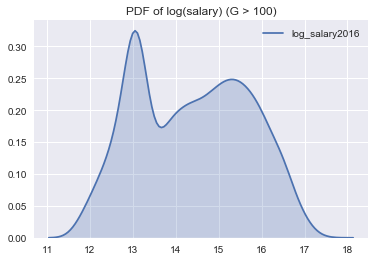

In [47]:
sns.kdeplot(salary_adj.log_salary2016, shade=True)
plt.title("PDF of log(salary) (G > 100)")
plt.show()

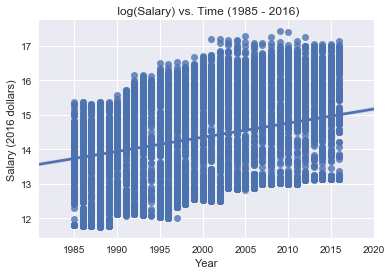

In [48]:
sns.regplot(x='yearID',
            y='log_salary2016',
           data=salary_adj)
plt.title(' log(Salary) vs. Time (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary (2016 dollars)')
plt.show()

In [49]:
list(salary_adj)

['yearID',
 'teamID',
 'lgID',
 'playerID',
 'salary',
 'stint',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF',
 'GIDP',
 'CPI',
 'salary2016',
 'mean_salary',
 'std_salary',
 'z_salary',
 'AVG',
 'log_salary2016']

In [50]:
y = salary_adj.log_salary2016
x = salary_adj[['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
               'GIDP', 'AVG']]

Create the training and test splits.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [52]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [53]:
predictions = lm.predict(X_test)

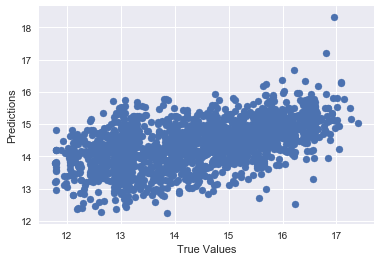

In [54]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [55]:
print("Score:", model.score(X_test, y_test))

Score: 0.264954129973


In [56]:
model.coef_



array([-0.02503773,  0.00473866,  0.00240907,  0.00520485, -0.00718765,
       -0.04318612,  0.00831403,  0.00118932,  0.00869797, -0.05877908,
        0.01174762, -0.00467583,  0.01781719,  0.01592018, -0.04143242,
        0.01536115,  0.01843618, -0.00442524])

In [57]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [60]:
import xgboost

In [ ]:
# First XGBoost model for Batting Salary dataset

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
# make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))